In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
#from sklearn.linear_model import LinearRegression


In [2]:
# Create an image of the Lorenz attractor.
# The maths behind this code is described in the scipython blog article
# at https://scipython.com/blog/the-lorenz-attractor/
# Christian Hill, January 2016.

# Lorenz paramters and initial conditions
sigma, beta, rho = 10, (8.00/3.00), 28
u0, v0, w0 = 0.1, 1.2, 1.2

In [3]:
#Lorentz_solver
tmax, n = 50, 2829
def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

In [4]:
t = np.linspace(0, tmax, n)
f = odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))
x, y, z = f.T

In [5]:
# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
c = np.linspace(0,1,n)
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(1,c[i],0), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()

plt.show()

NameError: name 'ax' is not defined

In [6]:
#calculation of 
tmax, n = 50, 2829
noise=1e-09
u0, v0, w0 = 0.1+noise, 1.2, 1.2
def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp
t = np.linspace(0, tmax, n)
f = odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))
x1, y1, z1 = f.T

In [7]:
#d=math.sqrt((x-x1)**2+(y-y1)**2+(z-z1)**2)

In [8]:
d=((x-x1)**2+(y-y1)**2+(z-z1)**2)**0.5

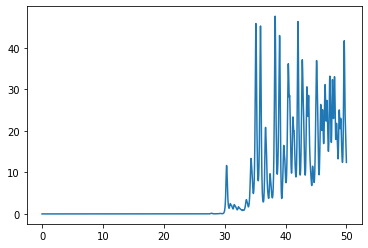

In [9]:
plt.plot(t,d)

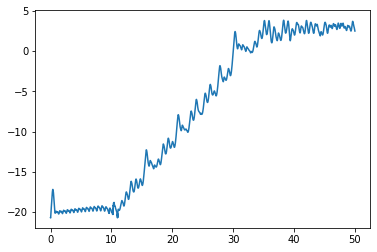

In [10]:
#plt.plot(t,np.log(d))
d1=np.log(d)
plt.plot(t,d1)

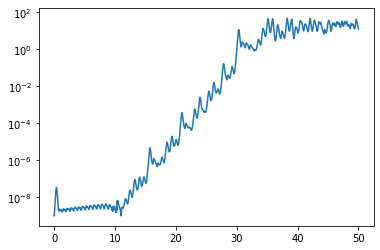

In [11]:
plt.semilogy(t,d)#plotting on semi log for cross-checking
#Finding index to restrict data to second quartile for plotting
N4=round(len(t)/4)
N2=round(len(t)/2)

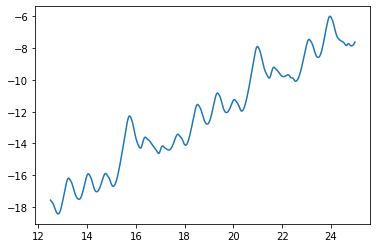

In [12]:
plt.plot(t[N4:N2],d1[N4:N2])
######clear saturation in the distance (see page 3 in the paper-highlights) here according to the paper Lyapunov exponents in constrained and unconstrained ordinary differential equations  

In [13]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [14]:
model = sm.OLS(t[N4:N2], d1[N4:N2])

In [16]:
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              3006.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                   1.17e-256
Time:                        12:06:21   Log-Likelihood:                         -2501.3
No. Observations:                 707   AIC:                                      5005.
Df Residuals:                     706   BIC:                                      5009.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
coefs=np.polyfit(t[N4:N2],d1[N4:N2],1)

0.8946707757689455


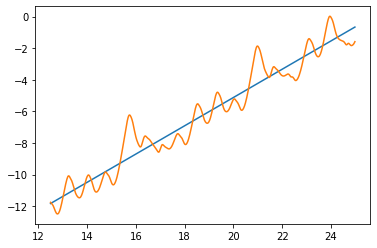

In [22]:
fit_line=np.polyval(coefs,t[N4:N2])
plt.plot(t[N4:N2],fit_line)
plt.plot(t[N4:N2],d1[N4:N2])
L_L_E=coefs[0]
print(L_L_E)

## L.E on full data

In [44]:
coefs=np.polyfit(t,d1,1)

0.5735912427735139


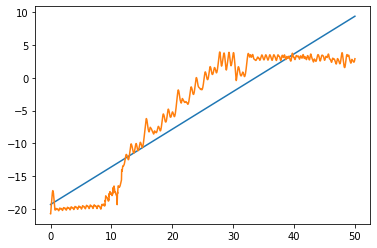

In [45]:
fit_line=np.polyval(coefs,t)
plt.plot(t,fit_line)
plt.plot(t,d1)
L_L_E=coefs[0]
print(L_L_E)

# Step-4 Method with quartile range

In [23]:
X_1 = []
for i,j,k in zip(x,y,z):
    X_1.append(np.array([i,j,k]))

In [24]:
X_2 = []
for i,j,k in zip(x1,y1,z1):
    X_2.append(np.array([i,j,k]))

In [26]:
N=len(t)

z=[]
for i in range (N):
    z.append(np.linalg.norm(np.array(X_1)[i,]-np.array(X_2)[i,]))
z= np.array(z).transpose() /z[0]

In [27]:
N4=round(N/4)#first quartile
N2=round(N/2)#second quartile

In [38]:
a=t[N4-1:N2+1]

In [29]:
b=[]
for each in z[N4-1:N2+1]:
    b.append(math.log2(each))

In [34]:
coefs=np.polyfit(a,b,1)

1.289758634381172


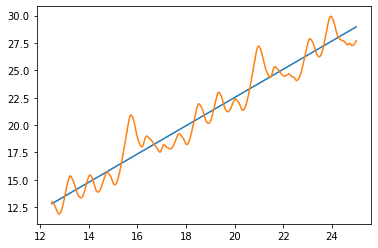

In [39]:
fit_line=np.polyval(coefs,a)
plt.plot(a,fit_line)
plt.plot(a,b)
L_L_E=coefs[0]
print(L_L_E)

## Step-4 on full data

In [40]:
a = t

In [41]:
b=[]
for each in z:
    b.append(math.log2(each))

In [42]:
coefs=np.polyfit(a,b,1)

0.8275172414466857


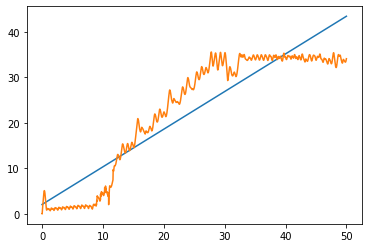

In [43]:
fit_line=np.polyval(coefs,a)
plt.plot(a,fit_line)
plt.plot(a,b)
L_L_E=coefs[0]
print(L_L_E)